In [18]:
# Importing required libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")


In [19]:
sample_data=pd.read_csv('sample_submission.csv')

In [20]:
train_data=pd.read_csv('house_train.csv')

In [21]:
test_data=pd.read_csv('house_test.csv')

In [22]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

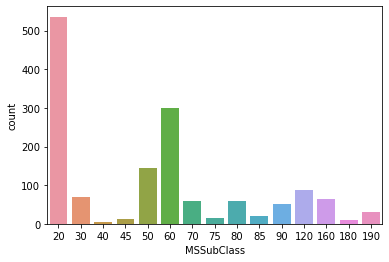

In [25]:
#Data Visualization for some selected columns for enquiry
sns.countplot(train_data.MSSubClass)

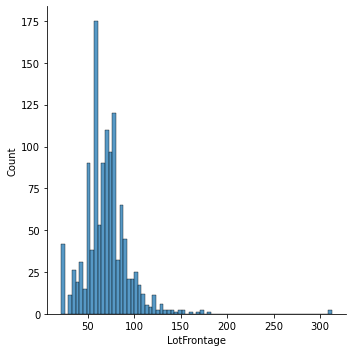

In [26]:
sns.displot(train_data.LotFrontage)

<AxesSubplot:xlabel='LotShape', ylabel='count'>

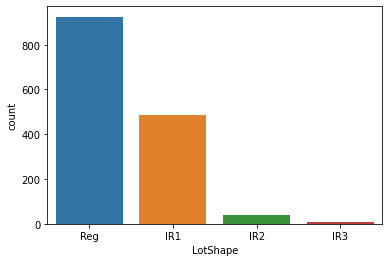

In [27]:
sns.countplot(train_data.LotShape)

<AxesSubplot:xlabel='Utilities', ylabel='count'>

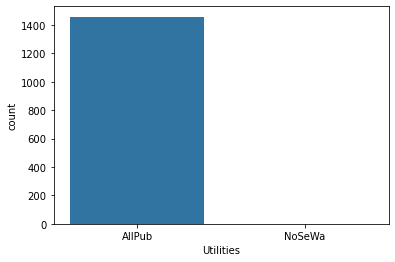

In [28]:
sns.countplot(train_data.Utilities)

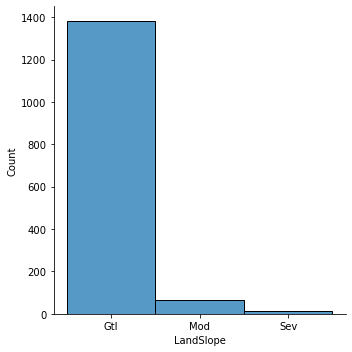

In [29]:
sns.displot(train_data.LandSlope)

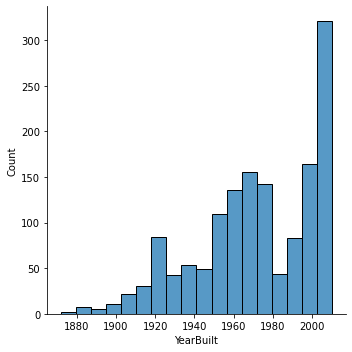

In [30]:
sns.displot(train_data.YearBuilt)

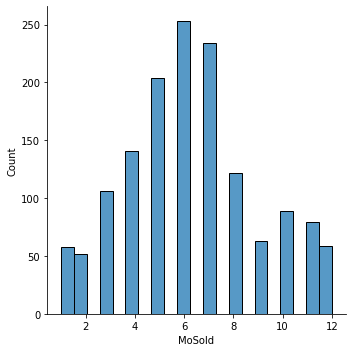

In [31]:
sns.displot(train_data.MoSold)

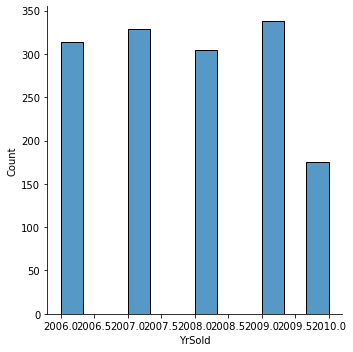

In [32]:
sns.displot(train_data.YrSold)

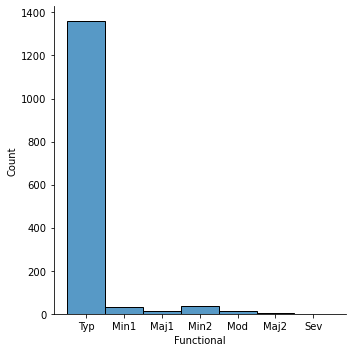

In [33]:
sns.displot(train_data.Functional)

In [34]:
#missing percentage of training data

missing_data=train_data.isnull().sum().sum()
total_cells=np.product(train_data.shape)

missing_values=(missing_data/total_cells)*100
missing_values

5.889565364451209

In [35]:
train_data.loc[:,'MSSubClass':'HeatingQC'].isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
dtype: int64

In [36]:
train_data.loc[:,'CentralAir':].isnull().sum()

CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [37]:
#missing percentage of testing data

missing_values=test_data.isnull().sum().sum()
total_values=np.product(test_data.shape)

percentage=(missing_values/total_values)*100
percentage

5.9972583961617545

In [38]:
test_data.loc[:,'MSSubClass':'HeatingQC'].isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
dtype: int64

In [39]:
test_data.loc[:,'CentralAir':].isnull().sum()

CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1456
Fence            1169
MiscFeature      1408
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
dtype: int64

In [40]:
train_data=pd.read_csv('house_train.csv')

In [41]:
x_train=train_data.loc[:,'MSSubClass':'SaleCondition']
y_train=train_data['SalePrice']

In [42]:
print(x_train.shape,y_train.shape)

(1460, 79) (1460,)


In [43]:
x_test=train_data.loc[:,'MSSubClass':'SaleCondition']
x_test.shape

(1460, 79)

In [44]:
columns_na_to_None = ['Alley',
                      'BsmtQual',
                      'BsmtCond',
                      'BsmtExposure',
                      'BsmtFinType1',
                      'BsmtFinType2',
                      'FireplaceQu',
                      'GarageType',
                      'GarageFinish',
                      'GarageQual',
                      'GarageCond',
                      'PoolQC',
                      'MiscFeature']

columns_na_to_mf = ['MasVnrType',
                    'Electrical',
                    'Fence']

columns_na_to_avg = ['LotFrontage',
                     'MasVnrArea',
                     'GarageYrBlt']

In [45]:
for columns in columns_na_to_None:
    imputer1=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='None')
    imputer1.fit(x_train.loc[:,columns_na_to_None])
    x_train.loc[:,columns_na_to_None]=imputer1.transform(x_train.loc[:,columns_na_to_None])
    
for column in columns_na_to_mf:
    imputer2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    imputer2.fit(x_train.loc[:, columns_na_to_mf])
    x_train.loc[:, columns_na_to_mf] = imputer2.transform(x_train.loc[:, columns_na_to_mf])

for column in columns_na_to_avg:
    imputer3 = SimpleImputer(missing_values = np.nan, strategy='mean')
    imputer3.fit(x_train.loc[:, columns_na_to_avg])
    x_train.loc[:, columns_na_to_avg] = imputer3.transform(x_train.loc[:, columns_na_to_avg])

In [46]:
columns_na_to_None = ['Alley',
                      'BsmtQual',
                      'BsmtCond',
                      'BsmtExposure',
                      'BsmtFinType1',
                      'BsmtFinType2',
                      'FireplaceQu',
                      'GarageType',
                      'GarageFinish',
                      'GarageQual',
                      'GarageCond',
                      'PoolQC',
                      'MiscFeature']

columns_na_to_mf = ['MSZoning',
                    'Utilities',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'Electrical',
                    'KitchenQual',
                    'Functional',
                    'Fence',
                    'SaleType']

columns_na_to_avg = ['LotFrontage',
                     'MasVnrArea',
                     'BsmtFinSF1',
                     'BsmtFinSF2',
                     'BsmtUnfSF',
                     'TotalBsmtSF',
                     'GarageYrBlt']

columns_na_to_0 = ['BsmtFullBath',
                   'BsmtHalfBath',
                   'GarageCars',
                   'GarageArea']

In [47]:
for columns in columns_na_to_None:
    imputer5=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='None')
    imputer5.fit(x_train.loc[:,columns_na_to_None])
    x_train.loc[:,columns_na_to_None]=imputer5.transform(x_train.loc[:,columns_na_to_None])

for columns in columns_na_to_mf:
    imputer6=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    imputer6.fit(x_train.loc[:,columns_na_to_mf])
    x_train.loc[:,columns_na_to_mf]=imputer6.transform(x_train.loc[:,columns_na_to_mf])
    
for columns in columns_na_to_avg:
    imputer7=SimpleImputer(missing_values=np.nan,strategy='mean')
    imputer7.fit(x_train.loc[:,columns_na_to_avg])
    x_train.loc[:,columns_na_to_avg]=imputer7.transform(x_train.loc[:,columns_na_to_avg])
    
for columns in columns_na_to_0:
    imputer8=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
    imputer8.fit(x_train.loc[:,columns_na_to_0])
    x_train.loc[:,columns_na_to_0]=imputer8.transform(x_train.loc[:,columns_na_to_0])

In [48]:
#For Training Data

x_train['HouseWorth']=x_train['OverallQual']+x_train['OverallCond']+x_train['BedroomAbvGr']+x_train['KitchenAbvGr']+x_train['GrLivArea']+x_train['TotRmsAbvGrd']
x_train['Total_bathrooms']=x_train['BsmtFullBath']+x_train['FullBath']+0.5*(x_train['BsmtHalfBath']+x_train['HalfBath'])
x_train['House_year'] = 0.5*(x_train['YearBuilt']+x_train['YearRemodAdd'])

In [49]:
x_train_copy=x_train.drop(columns=['OverallQual','OverallCond','BedroomAbvGr','KitchenAbvGr','GrLivArea','TotRmsAbvGrd','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','YearBuilt','YearRemodAdd'])

In [50]:
x_train_copy.shape

(1460, 70)

In [51]:
#For Testing Data

x_test['HouseWorth']=x_test['OverallQual']+x_test['OverallCond']+x_test['BedroomAbvGr']+x_test['KitchenAbvGr']+x_test['GrLivArea']+x_test['TotRmsAbvGrd']
x_test['Total_bathrooms']=x_test['BsmtFullBath']+x_test['FullBath']+0.5*(x_test['BsmtHalfBath']+x_test['HalfBath'])
x_test['House_year'] = 0.5*(x_test['YearBuilt']+x_test['YearRemodAdd'])

In [52]:
x_test_copy=x_test.drop(columns=['OverallQual','OverallCond','BedroomAbvGr','KitchenAbvGr','GrLivArea','TotRmsAbvGrd','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','YearBuilt','YearRemodAdd'])

In [53]:
x_test_copy.shape

(1460, 70)

In [54]:
#Categorical Encoding
x_train_encoded=x_train_copy.copy()
x_train_encoded=pd.get_dummies(x_train_copy)

In [55]:
x_test_encoded=x_test_copy.copy()
x_test_encoded=pd.get_dummies(x_test_copy)

In [56]:
# Here, it may happen that some features(attribute + value) are included in X_train_encoded, but not in X_test_encoded
# and vice versa
# so, to make sure both contain same number of columns, we have to delete/add columns that are not unique to both datasets
# to start, we first check the shape of both datasets

print(x_train_encoded.shape)
print(x_test_encoded.shape)

(1460, 292)
(1460, 279)


In [57]:
# as shape isn't equal, and #columns exceed in X_train_encoded than X_test_encoded, we will delete some columns 
# from X_train_encoded

list1 = list(x_train_encoded.columns)
list2 = list(x_test_encoded.columns)

for column in list1:
    if column not in list2:
        x_train_encoded.drop(columns=column,inplace=True)
    
print(x_train_encoded.shape)
print(x_test_encoded.shape)

(1460, 279)
(1460, 279)


In [58]:
# Feature Scaling

numeric_data=[]
catergory_data=[]

for column in x_train_copy.columns:
    if x_train_copy[column].dtype==object:
        catergory_data.append(column)
    else:
        numeric_data.append(column)

In [59]:
numeric_data

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'HouseWorth',
 'Total_bathrooms',
 'House_year']

In [60]:
catergory_data

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [61]:
# Applying feature scaling

sc_x=StandardScaler()
sc_y=StandardScaler()

x_train_encoded.loc[:,numeric_data]=sc_x.fit_transform(x_train_encoded.loc[:,numeric_data])
x_test_encoded.loc[:,numeric_data]=sc_x.transform(x_test_encoded.loc[:,numeric_data])

In [62]:
#Model Selection and Train test split

X=x_train_encoded
y=y_train.ravel()

x_train_final,x_test_final,y_train_final,y_test_final=train_test_split(X,y,test_size=0.25,random_state=1)

In [63]:
models = {
    "Ridge": Ridge(),
    "SGD": SGDRegressor(),
    "XG": XGBRegressor(),
    "GradientB": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "Adaboost": AdaBoostRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVR_rbf": SVR(kernel="rbf"),
    "SVR_lin": SVR(kernel="linear"),
    "SVR_poly": SVR(kernel="poly"),
}

In [64]:
for name, model in models.items():
    accuracies = cross_val_score(estimator = model, X = X, y = y.ravel(), cv = 10)
    print(name,"->", "Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Ridge -> Accuracy: 82.66 %
Standard Deviation: 11.60 %
SGD -> Accuracy: 83.34 %
Standard Deviation: 9.76 %
XG -> Accuracy: 82.66 %
Standard Deviation: 8.23 %
GradientB -> Accuracy: 87.71 %
Standard Deviation: 5.73 %
DecisionTree -> Accuracy: 69.73 %
Standard Deviation: 9.28 %
Adaboost -> Accuracy: 76.03 %
Standard Deviation: 5.99 %
RandomForest -> Accuracy: 85.87 %
Standard Deviation: 5.60 %
SVR_rbf -> Accuracy: -5.29 %
Standard Deviation: 3.14 %
SVR_lin -> Accuracy: 9.10 %
Standard Deviation: 3.71 %
SVR_poly -> Accuracy: -5.26 %
Standard Deviation: 3.12 %


In [65]:
sample_data=pd.read_csv('sample_submission.csv')

In [66]:
sample_data

,id,EAP,HPL,MWS
0,id02310,0.403494,0.287808,0.308698
1,id24541,0.403494,0.287808,0.308698
2,id00134,0.403494,0.287808,0.308698
3,id27757,0.403494,0.287808,0.308698
4,id04081,0.403494,0.287808,0.308698
...,...,...,...,...
8387,id11749,0.403494,0.287808,0.308698
8388,id10526,0.403494,0.287808,0.308698
8389,id13477,0.403494,0.287808,0.308698
8390,id13761,0.403494,0.287808,0.308698
